# Tutoriel avancé sur les fonctions d'affichage

Matplotlib permet de faire beaucoup d'affichages avancés. J'ai sélectionné les plus intéressants -parfois subjectivement-. Pour la liste exhaustive (et illustrée), c'est ici: [lien](https://matplotlib.org/stable/gallery/index.html)

**Note 1:** Pour certains usages avancés autour des stats (1D et 2D), la plupart des utilisateurs passent par `seaborn` qui propose des choses clés en main très esthétiques: [lien](https://seaborn.pydata.org)

**Note 2:** Matplotlib est nul en 3D (pas de z-buffer)... Mais matplotlib est tellement pratique qu'on l'utilise tout de même pour certains affichages !


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# pour avoir toutes les options d'affichage
# %matplotlib notebook
# OU pour un affichage léger et rapide
%matplotlib inline

## Boites à moustaches

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9f789e6e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9f789e6370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9f789e6dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9f78a04760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9f78a04250>],
 'means': []}

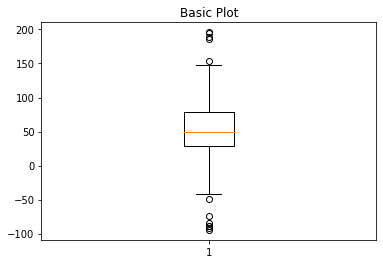

In [32]:

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

plt.figure()
plt.title('Basic Plot')
plt.boxplot(data)

## Intervalles de confiance

Reprise directe du tuto matplotlib: l'idée est d'apprendre à remplir entre 2 courbes. Il est aussi possible d'utiliser les outils externes, en particulier de la bibliothèque `seaborn` pour faire des calculs de stats en même temps.

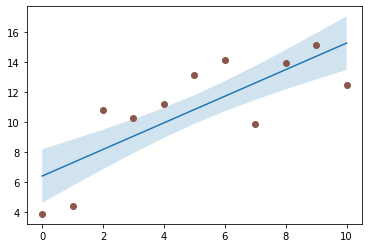

In [8]:

N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# alternative à scikit pour les algo les plus classiques => on va voir des choses plus avancées dans la suite
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2)) # calcul à la main

plt.figure()
plt.plot(x, y_est, '-')
plt.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
plt.plot(x, y, 'o', color='tab:brown')

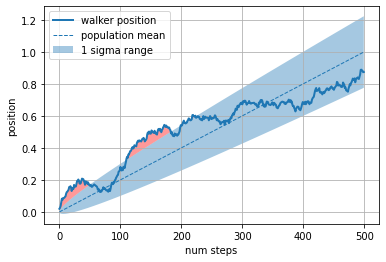

In [7]:
# usage avancé
np.random.seed(0)

# génération des données
Nsteps = 500
t = np.arange(Nsteps)
mu = 0.002
sigma = 0.01
S = mu + sigma*np.random.randn(Nsteps) # random walk
X = S.cumsum()

# calcul des intervalles
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

plt.figure() # = figure + récupération des identifiants
plt.plot(t, X, lw=2, label='walker position')
plt.plot(t, mu*t, lw=1, label='population mean', color='C0', ls='--')
plt.fill_between(t, lower_bound, upper_bound, facecolor='C0', alpha=0.4,
                label='1 sigma range')
plt.legend(loc='upper left')

# Trouver les indices de dépassement + colorier en rouge
# 
plt.fill_between(t, upper_bound, X, where=X > upper_bound, fc='red', alpha=0.4)
plt.fill_between(t, lower_bound, X, where=X < lower_bound, fc='red', alpha=0.4)
plt.xlabel('num steps')
plt.ylabel('position')
plt.grid()

## Affichage de distributions

En `seaborn` (pour vous obliger à installer et aller voir!)
Et comme ce genre d'opération se passent en cascade, il va aussi vous falloir `pandas`... Et la structure de donnée associée, le `dataframe`.

En deux mots: un `dataframe pandas` = une matrice `numpy` + nommage des colonnes. C'est donc du numpy avec une philosophie SQL. Pas besoin d'en savoir plus aujourd'hui, on pourra faire un tuto dédié à pandas si vous en avez besoin.

             x    y
0    72.666981  1.0
1    17.772429  1.0
2    82.947303  1.0
3    70.526135  1.0
4    68.469501  1.0
..         ...  ...
159  16.576320  3.0
160  16.896958  3.0
161  28.130364  3.0
162  12.637029  3.0
163  12.176757  3.0

[164 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

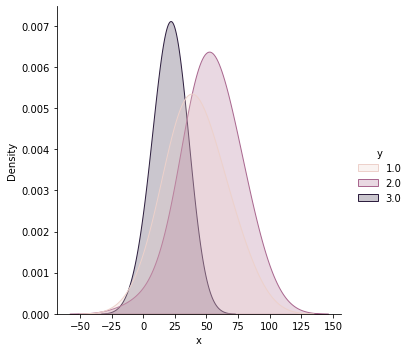

In [31]:
import seaborn as sns
import pandas as pd # il faut aussi pandas... pour utiliser seaborn :)
from numpy.random import normal as norm

# concatenation des données + ajout d'une étiquette
x = np.concatenate((norm(40,20,57),norm(50,20,65), norm(20, 10, 42) ))  # 2 gaussiennes
y = np.concatenate((np.ones(57),2*np.ones(65), 3*np.ones(42) )) 

# n'hésitez pas à demander... Je vous expliquerai rapidement les dataframes
data = pd.DataFrame({"x":x, "y":y}) # construction d'un dataframe = nommage des colonnes

print(data)

plt.figure()
sns.displot(data, x="x", hue = "y", kind="kde", bw_adjust=2, fill=True)


## Scatter + histogrammes

De nouveau, on utilise souvent directement les outils de `seaborn` qui proposent de nombreuses options graphiques assez esthétiques... Mais dans ce tuto avancé, on voit comment ça marche *from scratch*.
De nouveau, le tuto est directement tiré de celui de `matplotlib`

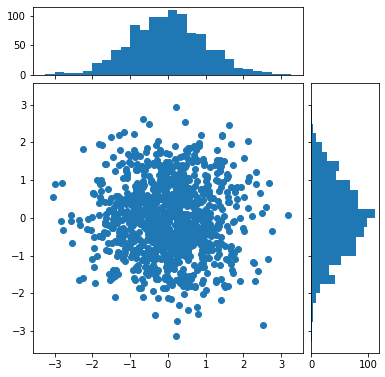

In [10]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

## Feedback et interactions

L'idéal est de passer par une autre bibliothèque, par exemple `bokeh` pour gérer facilement les interactions utilisateurs... Mais il est possible de le faire en matplotlib.

**Ca ne marche pas dans Visual Studio Code (et je n'ai pas vérifié en jupyter + browser)**

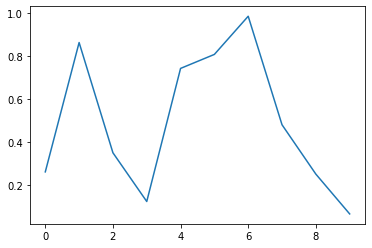

In [33]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Affichage 3D

Organisation générale pour réaliser un tracé en 3D `(x,y,z)`, en se plaçant dans le cas où 
$z = f(x,y)$ avec 

1. Définir l'espace d'intérêt sur $x$ et $y$. e.g. $x\in [0, 10]$, $y\in [-3,3]$
2. Construire une grille de points sur cet espace
    - `linspace` (pour générer des points sur une dimension) + `meshgrid` pour en faire un maillage
3. Evaluer la fonction sur la grille
    - ATTENTION, il y a souvent des problèmes de dimension dans les matrices
4. Afficher le résultat interpolé (c'est automatique !)
    - `contour`, `contourf`, `plot_surface`, ...


**Note:** dans la suite, on modifiera ces notations. Les entrées seront regroupées dans une matrice $X$ (ayant 2 colonnes pour stocker 2 séries d'observavtions correspondant respectivement aux anciens $(x,y)$) et on notera $f$, $Y$ ou $Z$ la troisième dimension.

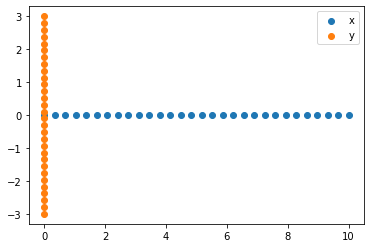

In [4]:
# 1. Définir l'espace d'intérêt sur $x$ et $y$. e.g. $x\in [0, 10]$, $y\in [-3,3]$

N = 30 # nombre de points à créer pour mailler l'espace
x = np.linspace(0,10,N)
y = np.linspace(-3,3,N)

plt.figure()
plt.scatter(x,[0]*len(x))
plt.scatter([0]*len(y),y)
plt.legend(["x","y"])


(30, 30)


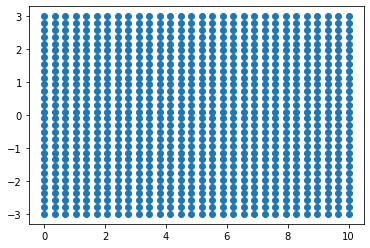

In [6]:
# 2. Construire une grille de points sur cet espace

xgrid, ygrid = np.meshgrid(x,y) # generation de la grille... Mais attention aux dimensions

plt.figure()
plt.scatter(xgrid,ygrid)

# mission accomplie... Mais on va avoir des soucis pour la raison suivante:
print(xgrid.shape) # les points sont stockés sous forme de matrice :)


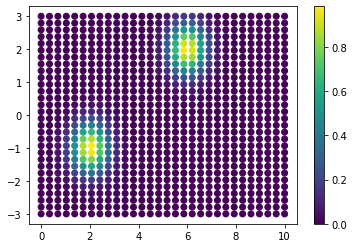

In [28]:
# 3. Evaluer la fonction sur la grille (v1)
zgrid = 3 * xgrid  -5* ygrid # ça marche évidemment même sur des matrices...
# dans un deuxième temps, c'est + rigolo de visualiser des gaussiennes:
# xmu = [2, 6]
# ymu = [-1, 2]
# sig = 0.75
# zgrid = np.sum([np.exp(-((xgrid-xmu[i])**2 + (ygrid-ymu[i])**2)/sig**2) for i in range(len(xmu))],0)

# on pourrait même avoir un semblant d'affichage 3D en utilisant des couleurs:
plt.figure()
plt.scatter(xgrid, ygrid, c = zgrid)
plt.colorbar()


## <span style="color: red"> EXO </span>

Obtenir le même résultat que ci-dessus mais en utilisant mettant $x$ et $y$ dans une matrice $X$ de deux colonnes et en calculant matriciellement $Z = X@w$ avec $w=[3,-5]$

(900, 2)


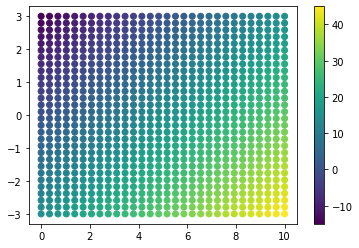

In [17]:
# 3. Evaluer la fonction sur la grille en calcul matriciel (v2)

# i. remettre xgrid et ygrid en vecteur colonne
# ii. concatener
# iii. déclarer le vecteur de paramètre w avec les bonnes dimensions
# iv. calculer Z et afficher

#  TODO 

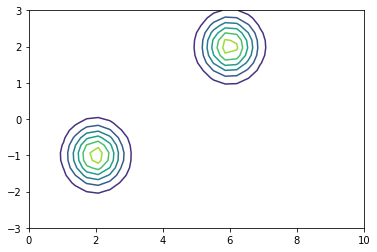

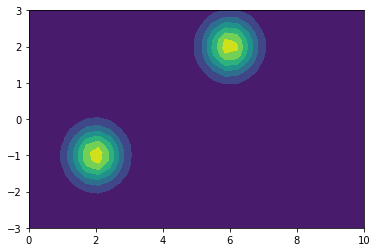

<Figure size 432x288 with 0 Axes>

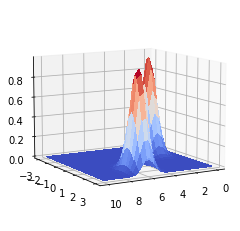

In [29]:
# 4. Afficher le résultat interpolé (c'est automatique !)

plt.figure()
plt.contour(xgrid, ygrid, zgrid) # ligne de niveaux

plt.figure()
plt.contourf(xgrid, ygrid, zgrid) # + remplissage

from matplotlib import cm

plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xgrid, ygrid, zgrid, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(elev=10., azim=60) # reglage du point de vue


# Fabrication du sujet à partir de la correction

In [1]:
import re
# transformation de cet énoncé en version étudiante

fname = "6_Affichage_avance-corr.ipynb" # ce fichier
fout  = fname.replace("-corr","")

# print("Fichier de sortie: ", fout )

f = open(fname, "r")
txt = f.read()
 
f.close()


f2 = open(fout, "w")
f2.write(re.sub(" TODO )"," TODO ",\
    txt, flags=re.DOTALL))
f2.close()

